In [2]:
# !pip install numpy
# !pip install pandas
# !pip install csv
# !pip install matplotlib
# !pip install seaborn
# !pip install tqdm

In [3]:
# !pip install --upgrade pip

Imports

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from functools import total_ordering
import bisect
from heapq import merge
from collections import Counter
from tqdm import tqdm

Constants

In [6]:
filename = "Real Students Grades.csv"

Read Data

In [32]:
with open(filename, 'r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if needed
    next(csv_reader, None)
    # Iterate over each row in the CSV file
    sat = []
    bagrut = []
    for row in csv_reader:
        if row[0] and row[1] and float(row[1]) > 0:
            sat.append(float(row[0]))
            bagrut.append(float(row[1]))
sat = np.array(sat)
bagrut = np.array(bagrut)

Visualize the initial data distribution

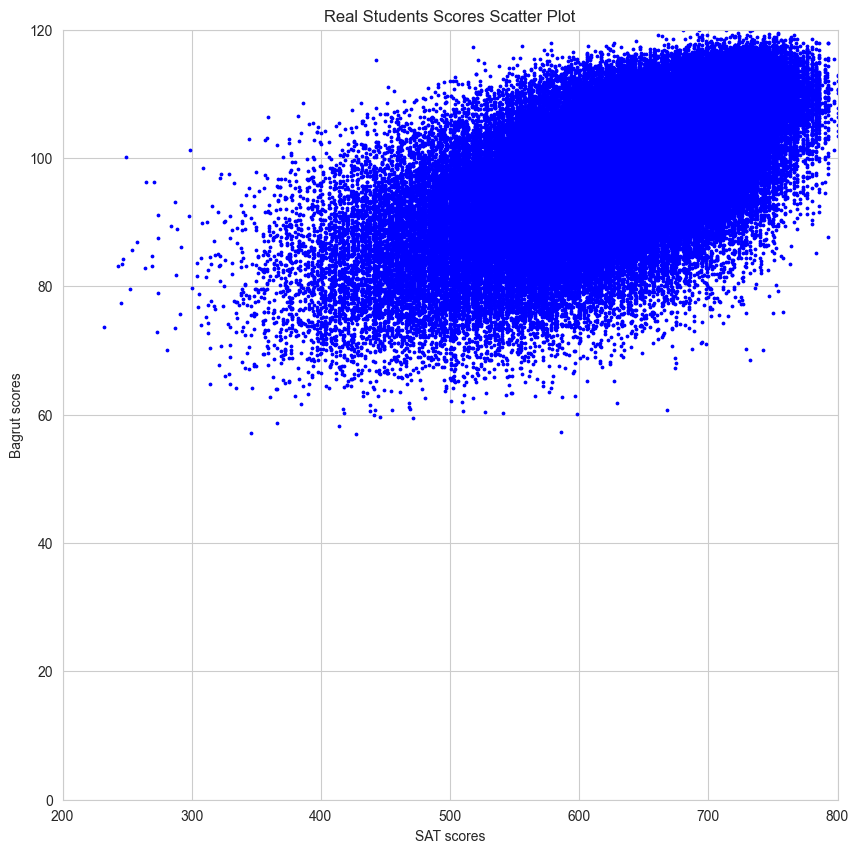

In [28]:
plt.figure(figsize=(10, 10))
plt.xlim(200, 800)
plt.ylim(0, 120)
plt.scatter(sat, bagrut, color='blue', s=3)
plt.xlabel('SAT scores')
plt.ylabel('Bagrut scores')
plt.title('Real Students Scores Scatter Plot')
plt.grid(True)
plt.savefig("plots/png/real_students.png")
plt.savefig("plots/pdf/real_students.pdf")
plt.show()

In [4]:
print(np.shape(sat)) # number os students

(136939,)


Choosing subset of the samples for analyzing for complexity reduction

In [33]:
students = np.stack((sat, bagrut), axis=1)
print(np.shape(students))
students = pd.DataFrame(students)

(136939, 2)


In [10]:
def check_sorted(arr):
    for i in range(1, len(arr)):
        if arr[i][1] < arr[i-1][1]:
            print(i)
            return False
    return True

RSK algorithm

In [2]:
def insert_to_pile(element, pile):
    # enter element to the sorted array "pile", and return the next element
    low = 0
    high = len(pile)-1
    while low <= high: # binary search
        mid = (low+high)//2
        if pile[mid][1] <= element[1]:
            low = mid + 1
        else:
            high = mid - 1
    pile.insert(low, element) # insert element
    next_element = pile.pop(low + 1)  # remove and return the next element for RSK
    return next_element

In [3]:
def RSK(df):
    df = df.sort_values(by=df.columns[0])
    df = df.reset_index(drop = True)
    piles = []
    for i in tqdm(range(df.shape[0])):
        if not piles:
            piles.append([df.iloc[i]])
        else:
            flag = True
            element = df.iloc[i] # first element to add to piles
            for pile in piles:
                if element[1] >= pile[-1][1]:
                    pile.append(element)
                    flag = False
                    break
                else:
                    # prev = pile.copy()
                    # prev_element = element.copy()
                    element = insert_to_pile(element, pile)
                    # if not check_sorted(pile):
                    #     print(f'prev = {prev}')
                    #     print(f'inserted element = {prev_element}')
                    #     print(f'pile = {pile}')
                    #     print(f'next element = {element}')
                    #     return 
            if flag:
                piles.append([element])
    return piles       

Performing RSK on real Students

In [34]:
piles = RSK(students)

100%|██████████| 136939/136939 [09:55<00:00, 230.12it/s]


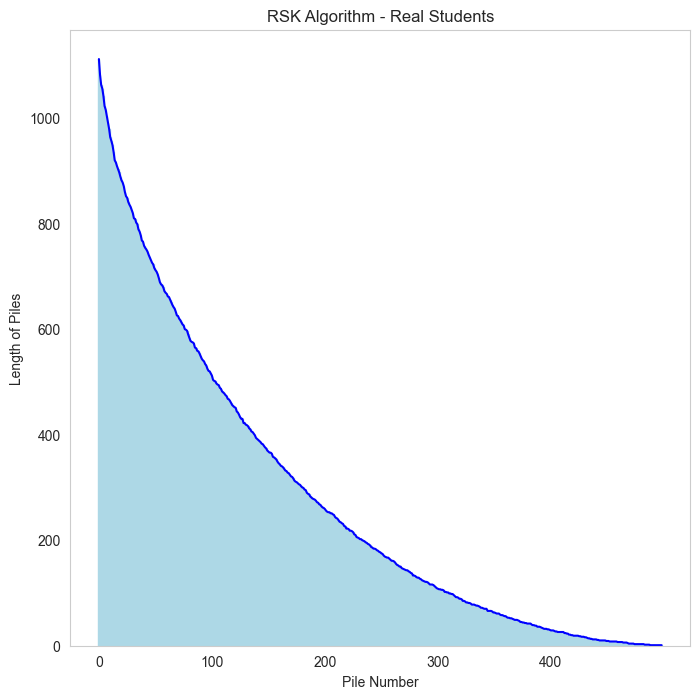

In [35]:
lists_lengths = [len(sublist) for sublist in piles]
list_indices = range(len(piles))
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a bar plot
ax.bar(list_indices, lists_lengths, color='skyblue', edgecolor='lightblue', label='List Lengths')

# Create a line plot
ax.plot(list_indices, lists_lengths, color='blue', linestyle='-', label='Line Connects')

# Set x-axis ticks to match list indices
ax.set_xticks(list_indices)

# Set labels and title
ax.set_xticks(range(0, len(piles), 100))
ax.set_xlabel('Pile Number')
ax.set_ylabel('Length of Piles')
ax.set_title('RSK Algorithm - Real Students')
ax.grid(False)
plt.savefig("plots/png/RSK_real_students.png")
plt.savefig("plots/pdf/RSK_real_students.pdf")

plt.show()

Choosing random points in square

In [11]:
def random_square():
    x = []
    y = []
    for i in range(len(sat)):
        x.append(random.random())
        y.append(random.random())
    df = pd.DataFrame({'x': x, 'y': y})
    return df

In [31]:
random_square_df = random_square()

# Plot the DataFrame
plt.figure(figsize=(8, 8))
plt.scatter(random_square_df['x'], random_square_df['y'], color='blue', s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points - Square')
plt.grid(True)
plt.savefig("plots/pdf/random_square.png")
plt.savefig("plots/png/random_square.png")
plt.show()

NameError: name 'random_square' is not defined

Performing RSK on Square

In [13]:
random_square_piles = RSK(random_square_df)

  0%|          | 0/136939 [00:00<?, ?it/s]C:\Users\rotem\AppData\Local\Temp\ipykernel_3248\3728322032.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if element[1] >= pile[-1][1]:
C:\Users\rotem\AppData\Local\Temp\ipykernel_3248\585434940.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pile[mid][1] <= element[1]:
 10%|▉         | 13028/136939 [01:25<13:37, 151.65it/s]


KeyboardInterrupt: 

In [13]:
lists_lengths_square = [len(sublist) for sublist in random_square_piles]
list_indices_square = range(len(random_square_piles)) 
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a bar plot
ax.bar(list_indices_square, lists_lengths_square, color='skyblue', edgecolor='lightblue', label='List Lengths')

# Create a line plot
ax.plot(list_indices_square, lists_lengths_square, color='blue', linestyle='-', label='Line Connects')

# Set x-axis ticks to match list indices
ax.set_xticks(list_indices_square)

# Set labels and title
ax.set_xticks(range(0, len(random_square_piles), 100))
ax.set_xlabel('Pile Number')
ax.set_ylabel('Length of Piles')
ax.set_title('RSK Algorithm - Random in Square')
ax.grid(False)
plt.savefig("plots/png/RSK_random_square.png")
plt.savefig("plots/pdf/RSK_random_square.pdf")

plt.show()

NameError: name 'random_square_piles' is not defined

Choosing random points in rhombus

In [8]:
def random_rhombus():
    points = []
    while len(points) < len(sat):
        x = random.random()  
        y = random.random()  
        
        # Check if the point falls within the rhombus
        if (x >= 0 and x <= 0.5 and y >= 0.5 - x and y <= 0.5 + x) or \
           (x >= 0.5 and x <= 1 and y >= x - 0.5 and y <= 1.5 - x):
            points.append((x, y))
    
    # Create a DataFrame from the list of points
    df = pd.DataFrame(points, columns=['x', 'y'])
    return df

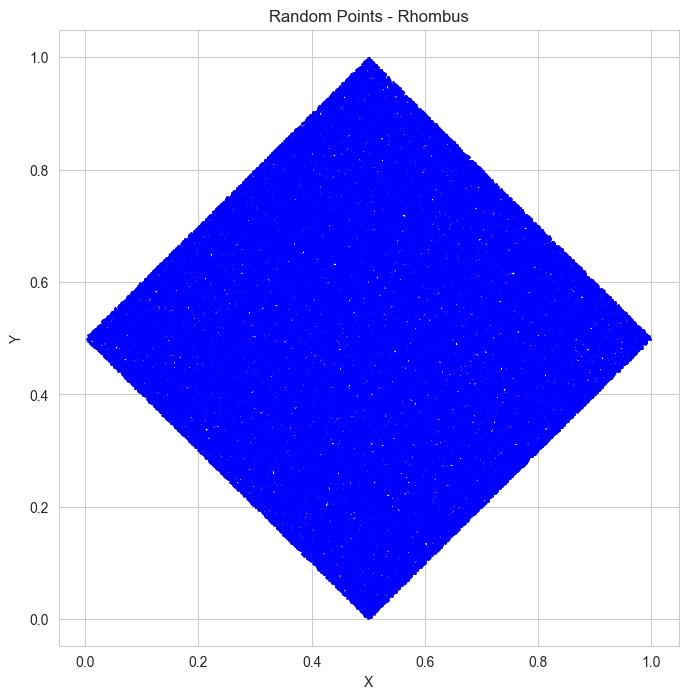

In [24]:
random_rhombus_df = random_rhombus()

# Plot the DataFrame
plt.figure(figsize=(8, 8))
plt.scatter(random_rhombus_df['x'], random_rhombus_df['y'], color='blue', s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points - Rhombus')
plt.grid(True)
plt.savefig("plots/png/random_rhombus.png")
plt.savefig("plots/pdf/random_rhombus.pdf")
plt.show()

Performing RSK on rhombus

In [10]:
random_rhombus_piles = RSK(random_rhombus_df)

  0%|          | 0/136939 [00:00<?, ?it/s]C:\Users\rotem\AppData\Local\Temp\ipykernel_5872\3728322032.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if element[1] >= pile[-1][1]:
C:\Users\rotem\AppData\Local\Temp\ipykernel_5872\585434940.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pile[mid][1] <= element[1]:
100%|██████████| 136939/136939 [1:36:15<00:00, 23.71it/s] 


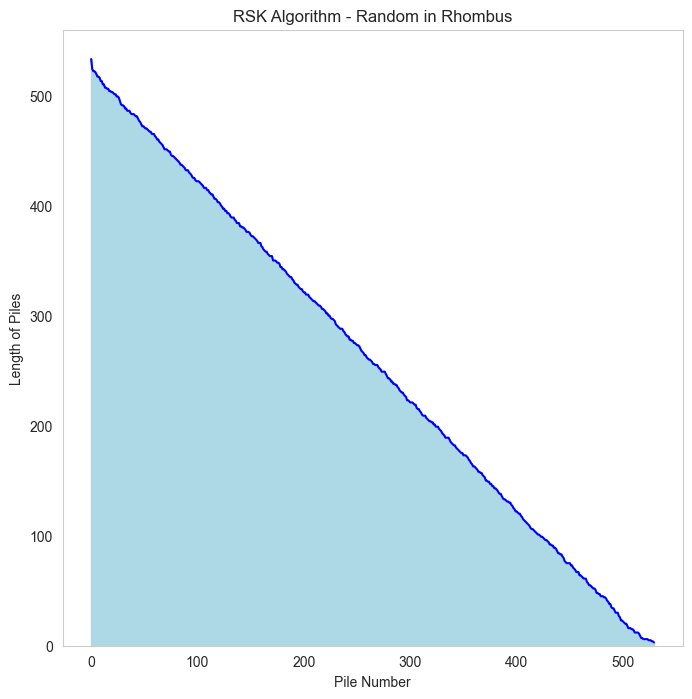

In [23]:
lists_lengths_rhombus = [len(sublist) for sublist in random_rhombus_piles]
list_indices_rhombus = range(len(random_rhombus_piles)) 
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a bar plot
ax.bar(list_indices_rhombus, lists_lengths_rhombus, color='skyblue', edgecolor='lightblue', label='List Lengths')

# Create a line plot
ax.plot(list_indices_rhombus, lists_lengths_rhombus, color='blue', linestyle='-', label='Line Connects')

# Set x-axis ticks to match list indices
ax.set_xticks(list_indices_rhombus)

# Set labels and title
ax.set_xticks(range(0, len(random_rhombus_piles), 100))
ax.set_xlabel('Pile Number')
ax.set_ylabel('Length of Piles')
ax.set_title('RSK Algorithm - Random in Rhombus')
ax.grid(False)
plt.savefig("plots/png/RSK_random_rhombus.png")
plt.savefig("plots/pdf/RSK_random_rhombus.pdf")

plt.show()

Choosing random points in circle

In [15]:
def random_circle():
    points = []
    radius = 0.5
    
    while len(points) < len(sat):
        # Generate random x and y coordinates within the square
        x = random.random()
        y = random.random()
        
        # Calculate the distance from the point to the center of the square
        distance = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
        
        # Check if the point falls within the inscribed circle
        if distance <= radius:
            points.append((x, y))
    
    # Create a DataFrame from the list of points
    df = pd.DataFrame(points, columns=['x', 'y'])
    return df

Random points in circle

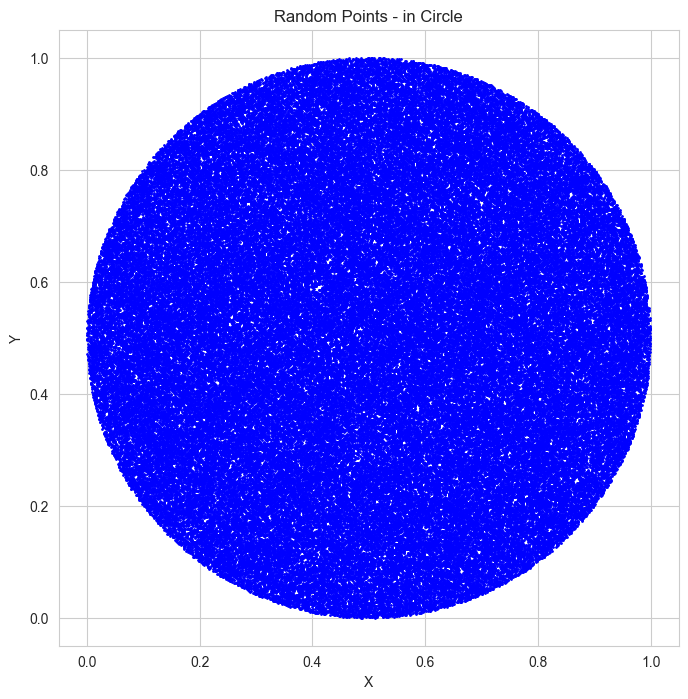

In [22]:
random_circle_df = random_circle()

# Plot the DataFrame
plt.figure(figsize=(8, 8))
plt.scatter(random_circle_df['x'], random_circle_df['y'], color='blue', s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points - in Circle')
plt.grid(True)
plt.savefig("plots/pdf/random_circle.pdf")
plt.savefig("plots/png/random_circle.png")
plt.show()

Performing RSK on circle

In [17]:
random_circle_piles = RSK(random_circle_df)

  0%|          | 0/136939 [00:00<?, ?it/s]C:\Users\rotem\AppData\Local\Temp\ipykernel_5872\3728322032.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if element[1] >= pile[-1][1]:
C:\Users\rotem\AppData\Local\Temp\ipykernel_5872\585434940.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pile[mid][1] <= element[1]:
100%|██████████| 136939/136939 [1:26:50<00:00, 26.28it/s]


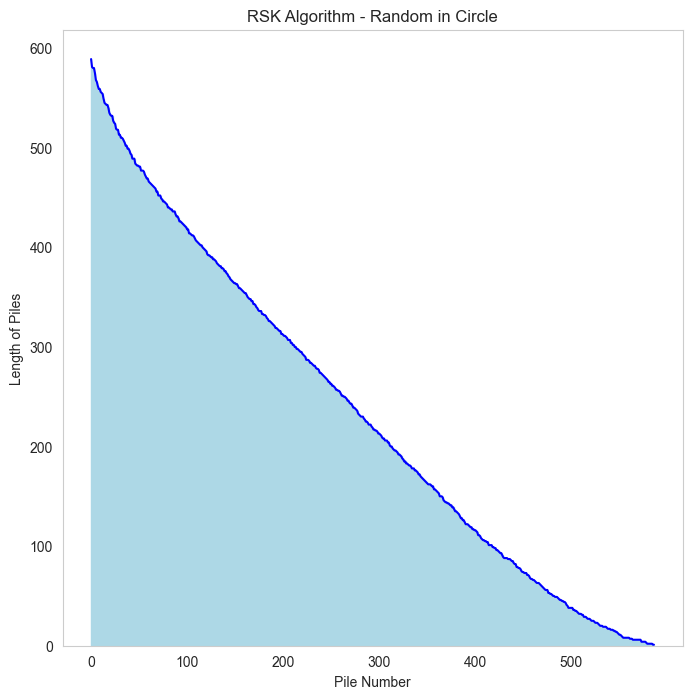

In [26]:
lists_lengths_circle = [len(sublist) for sublist in random_circle_piles]
list_indices_circle = range(len(random_circle_piles)) 
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a bar plot
ax.bar(list_indices_circle, lists_lengths_circle, color='skyblue', edgecolor='lightblue', label='List Lengths')

# Create a line plot
ax.plot(list_indices_circle, lists_lengths_circle, color='blue', linestyle='-', label='Line Connects')

# Set x-axis ticks to match list indices
ax.set_xticks(list_indices_circle)

# Set labels and title
ax.set_xticks(range(0, len(random_circle_piles), 100))
ax.set_xlabel('Pile Number')
ax.set_ylabel('Length of Piles')
ax.set_title('RSK Algorithm - Random in Circle')
ax.grid(False)
plt.savefig("plots/png/RSK_random_circle.png")
plt.savefig("plots/pdf/RSK_random_circle.pdf")

plt.show()